In [3]:
import warnings
warnings.filterwarnings('ignore')


# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 폰트 설정 (Colab/로컬 환경 모두 지원)
import matplotlib.pyplot as plt
import os
import sys

def set_korean_font():
    try:
        # Colab 환경 (나눔고딕)
        import matplotlib.font_manager as fm
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        if os.path.exists(font_path):
            plt.rcParams['font.family'] = 'NanumGothic'
            return
    except:
        pass
    # macOS
    if sys.platform == 'darwin':
        plt.rcParams['font.family'] = 'AppleGothic'
    # Windows
    elif sys.platform.startswith('win'):
        plt.rcParams['font.family'] = 'Malgun Gothic'
    # 기타(리눅스 등)
    else:
        plt.rcParams['font.family'] = 'DejaVu Sans'

set_korean_font()
plt.rcParams['axes.unicode_minus'] = False

zsh:1: command not found: apt-get
zsh:1: command not found: apt-get
zsh:1: command not found: fc-cache
rm: /Users/hanhyegyeong/.cache/matplotlib: No such file or directory
rm: -rf: No such file or directory


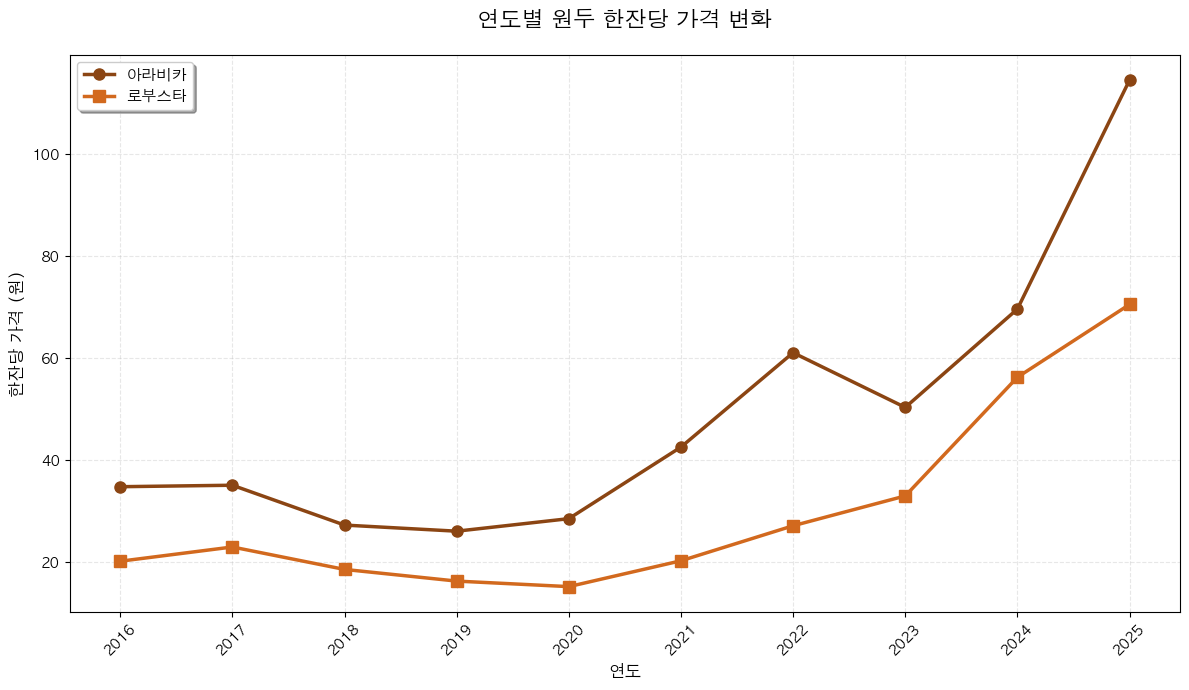

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# CSV 파일 읽기
df = pd.read_csv('../../data/processed/coffee_bean_comparison.csv', encoding='utf-8')
df = df[df['연도']>=2016]

# 그래프 크기 설정
plt.figure(figsize=(12, 7))

# 라인 그래프 그리기
plt.plot(df['연도'], df['아라비카_한잔당(원)'],
         marker='o', linewidth=2.5, markersize=8,
         label='아라비카', color='#8B4513')  # 커피색
plt.plot(df['연도'], df['로부스타_한잔당(원)'],
         marker='s', linewidth=2.5, markersize=8,
         label='로부스타', color='#D2691E')  # 밝은 커피색

# 그래프 스타일 설정
plt.title('연도별 원두 한잔당 가격 변화', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('연도', fontsize=12, fontweight='bold')
plt.ylabel('한잔당 가격 (원)', fontsize=12, fontweight='bold')

# 격자 추가
plt.grid(True, alpha=0.3, linestyle='--')

# 범례 설정
plt.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# x축 눈금 설정 (모든 연도 표시)
plt.xticks(df['연도'], rotation=45)

# y축 포맷 설정 (천 단위 구분)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()